# **Install Library**

In [ ]:
pip install adversarial-robustness-toolbox

# **Pre-trained model--Save Correct Examples and Labels**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load pre-trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')  # Update with the path to your model

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Reshape the data to fit the model
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Get the model's predictions on the test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)


nb_correct_pred = np.sum(predicted_labels == y_test)

print("Original test data:")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(len(x_test)-nb_correct_pred))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f'Test accuracy: {accuracy:.3f}')

# Save only the examples that the model identifies correctly
correct_indices = predicted_labels == y_test
correct_examples = x_test[correct_indices]
correct_labels = y_test[correct_indices]

# Save the correct examples and their labels
np.save('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy', correct_examples)
np.save('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy', correct_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Original test data:
Correctly classified: 9834
Incorrectly classified: 166


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test accuracy: 0.983


# **Count the occurrences of each label in the test set**

In [ ]:
# Count the occurrences of each label in the test set
unique, counts = np.unique(y_test, return_counts=True)
correct_labels_counts = dict(zip(unique, counts))
print("correct_labels_counts:", correct_labels_counts)
for label, count in correct_labels_counts.items():
    print(f"Label {label}: {count}")

correct_labels_counts: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}
Label 0: 980
Label 1: 1135
Label 2: 1032
Label 3: 1010
Label 4: 982
Label 5: 892
Label 6: 958
Label 7: 1028
Label 8: 974
Label 9: 1009


# **Count the occurrences of each predicted_labels in the set**

In [ ]:
# Count the occurrences of each label in the predicted_labels
unique, counts = np.unique(predicted_labels, return_counts=True)
predicted_labels_counts = dict(zip(unique, counts))
print("correct_predicted set label counts:", predicted_labels_counts)
for label, count in predicted_labels_counts.items():
    print(f"Label {label}: {count}")

total_predicted_labels_count = len(predicted_labels)

# Display the total count of all labels
print(f"Total count of all total_predicted_labels_count combined in the MNIST dataset: {total_predicted_labels_count}")

correct_predicted set label counts: {0: 992, 1: 1157, 2: 1037, 3: 999, 4: 983, 5: 904, 6: 943, 7: 1024, 8: 954, 9: 1007}
Label 0: 992
Label 1: 1157
Label 2: 1037
Label 3: 999
Label 4: 983
Label 5: 904
Label 6: 943
Label 7: 1024
Label 8: 954
Label 9: 1007
Total count of all total_predicted_labels_count combined in the MNIST dataset: 10000


# **Calculate the confusion matrix of Pretrained Model**

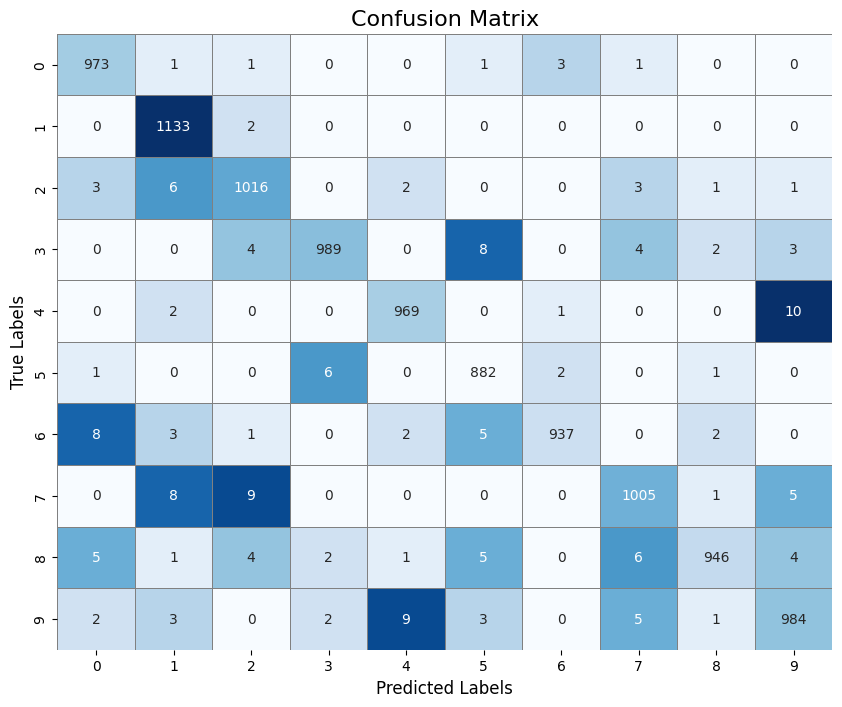

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels,labels=range(10))

# Create a mask for the diagonal elements
mask = np.eye(len(cm), dtype=bool)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap for off-diagonal elements using the mask
# Use a professional color palette like 'Blues'
sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Plot the heatmap for diagonal elements using the inverse of the mask
# Use the same color palette for consistency
sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Labels, title and ticks
label_names = [f'{i}' for i in range(10)]
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=16)
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)

plt.savefig('model.png', bbox_inches='tight')
plt.show()

# **Check Correct Examples Accuracy**

In [ ]:
 # For clean examples
y_pred_clean = np.argmax(model.predict(correct_examples), axis=1)
accuracy_clean = np.sum(y_pred_clean == correct_labels) / len(correct_labels)
print(f"Accuracy on clean data: {accuracy_clean * 100:.2f}%")


Accuracy on clean data: 100.00%


# **Count the occurrences of each correct label in set**

In [ ]:

# Count the occurrences of each label in the test set
unique, counts = np.unique(correct_labels, return_counts=True)
correct_labels_counts = dict(zip(unique, counts))
print("correct_labels_counts:", correct_labels_counts)
for label, count in correct_labels_counts.items():
    print(f"Label {label}: {count}")

correct_labels_counts: {0: 973, 1: 1133, 2: 1016, 3: 989, 4: 969, 5: 882, 6: 937, 7: 1005, 8: 946, 9: 984}
Label 0: 973
Label 1: 1133
Label 2: 1016
Label 3: 989
Label 4: 969
Label 5: 882
Label 6: 937
Label 7: 1005
Label 8: 946
Label 9: 984


In [ ]:
predictions.shape

(10000, 10)

# **FastGradientMethod-- eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6] Without Label**

Accuracy on clean data: 100.00%
Adversarial test data: eps:0.01
Correctly classified: 9774
Incorrectly classified: 60
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.01
Accuracy on adversarial examples: 99.39%


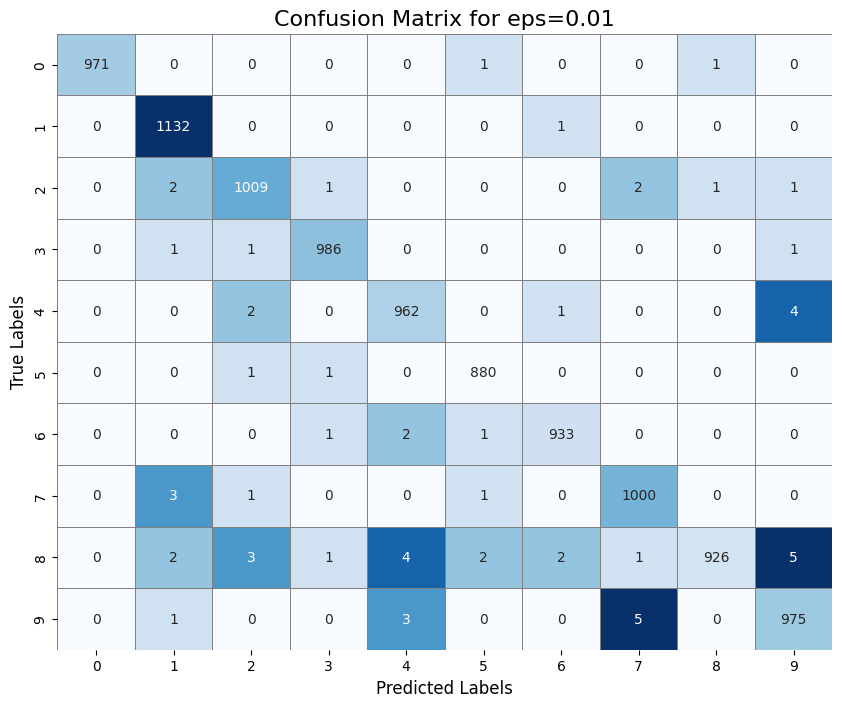

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.02
Correctly classified: 9692
Incorrectly classified: 142
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.02
Accuracy on adversarial examples: 98.56%


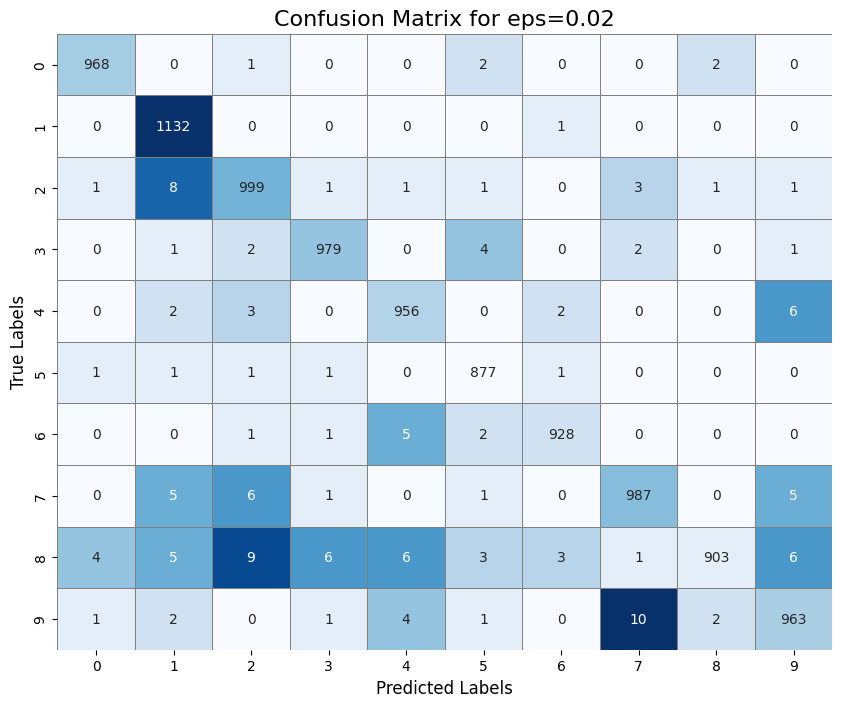

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.03
Correctly classified: 9550
Incorrectly classified: 284
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.03
Accuracy on adversarial examples: 97.11%


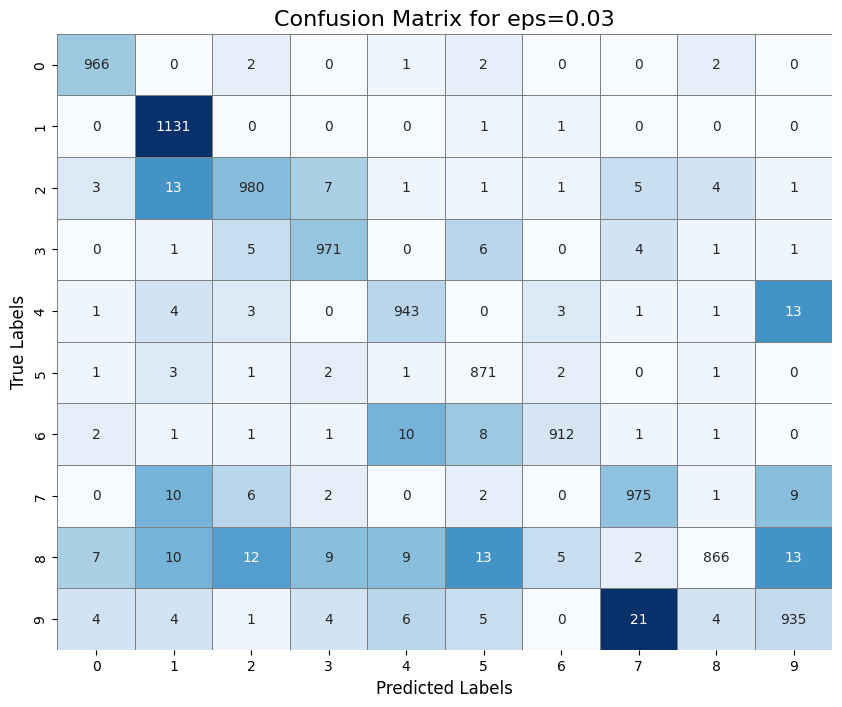

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.04
Correctly classified: 9394
Incorrectly classified: 440
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.04
Accuracy on adversarial examples: 95.53%


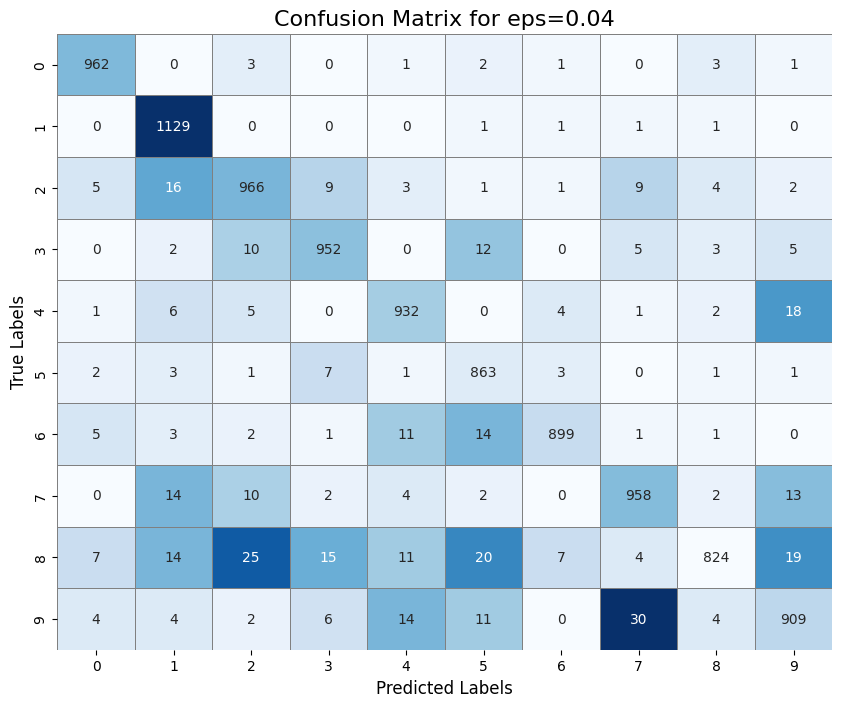

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.05
Correctly classified: 9132
Incorrectly classified: 702
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.05
Accuracy on adversarial examples: 92.86%


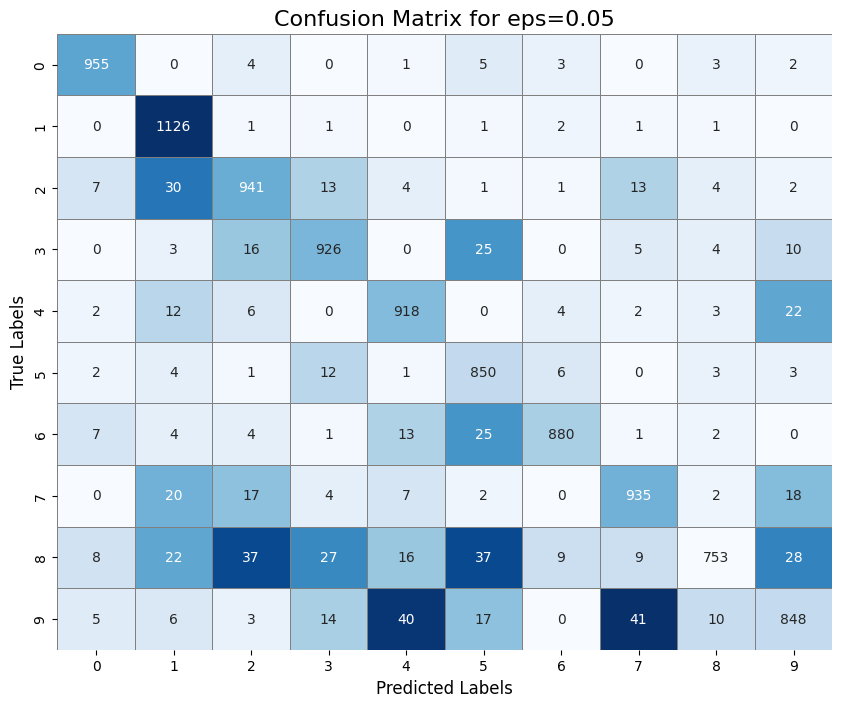

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.1
Correctly classified: 6834
Incorrectly classified: 3000
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.1
Accuracy on adversarial examples: 69.49%


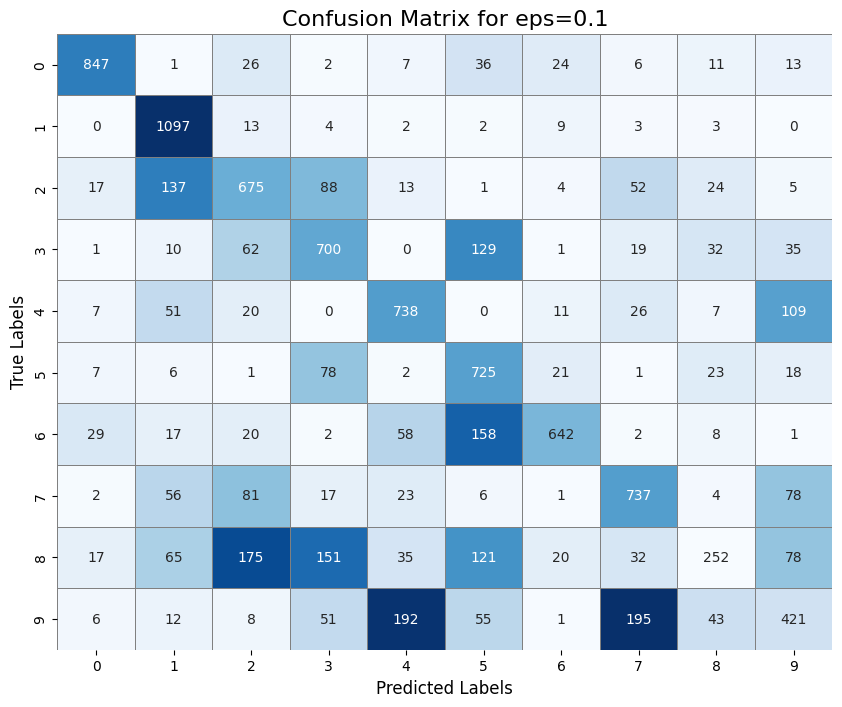

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.2
Correctly classified: 2300
Incorrectly classified: 7534
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.2
Accuracy on adversarial examples: 23.39%


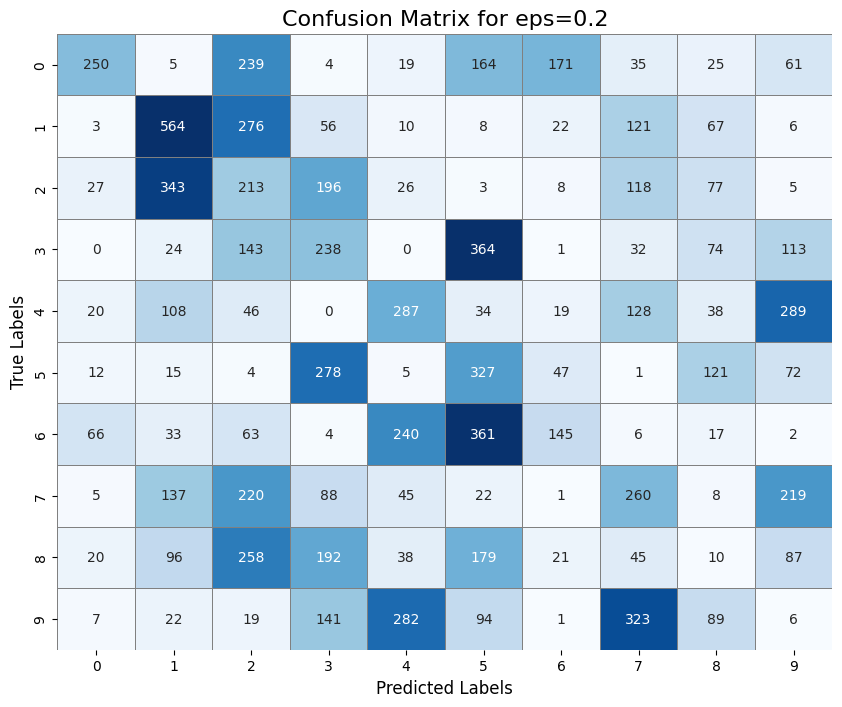

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.3
Correctly classified: 793
Incorrectly classified: 9041
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.3
Accuracy on adversarial examples: 8.06%


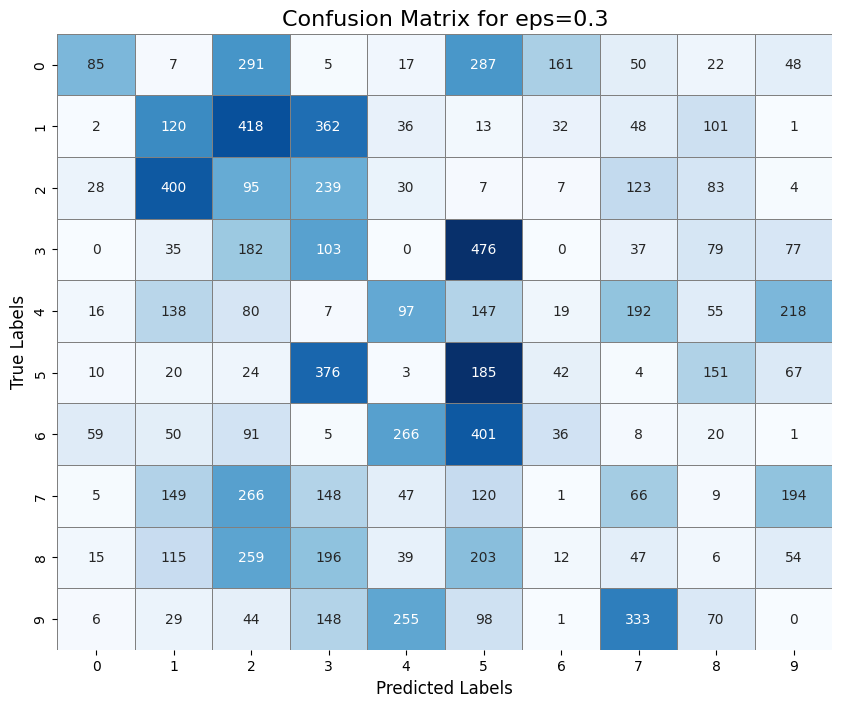

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.4
Correctly classified: 347
Incorrectly classified: 9487
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.4
Accuracy on adversarial examples: 3.53%


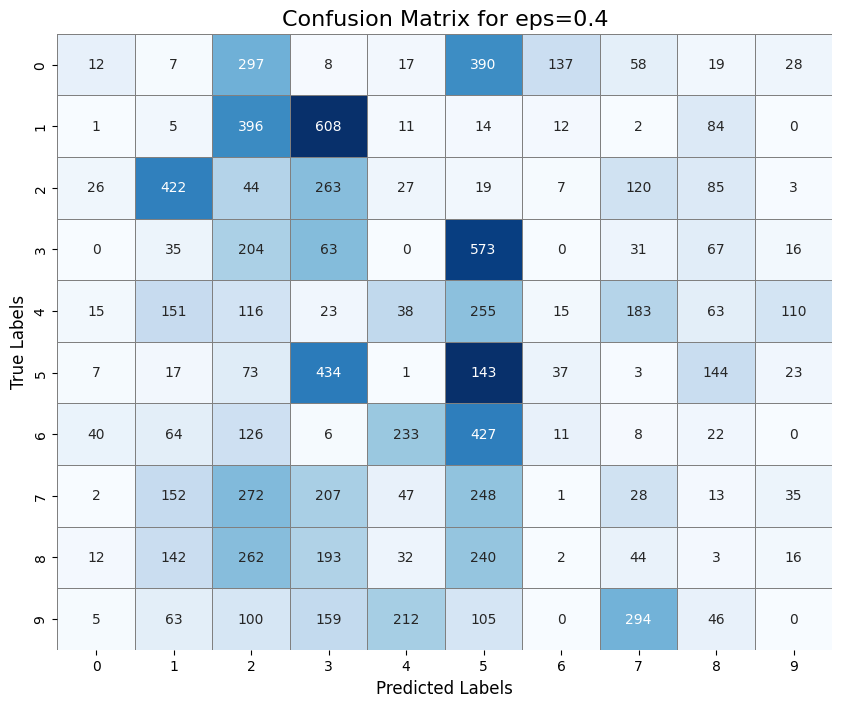

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.5
Correctly classified: 211
Incorrectly classified: 9623
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.5
Accuracy on adversarial examples: 2.15%


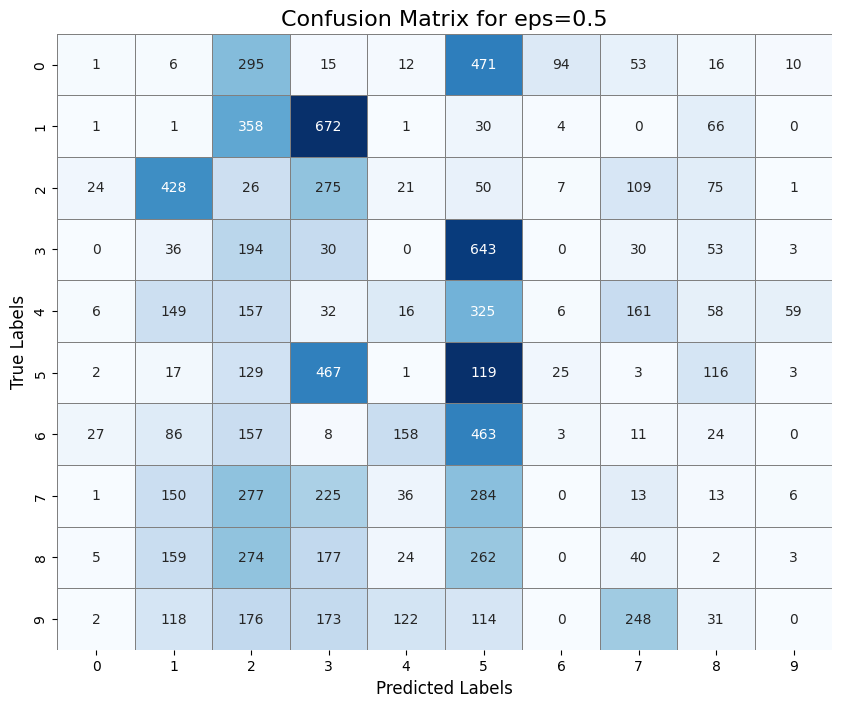

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.6
Correctly classified: 161
Incorrectly classified: 9673
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.6
Accuracy on adversarial examples: 1.64%


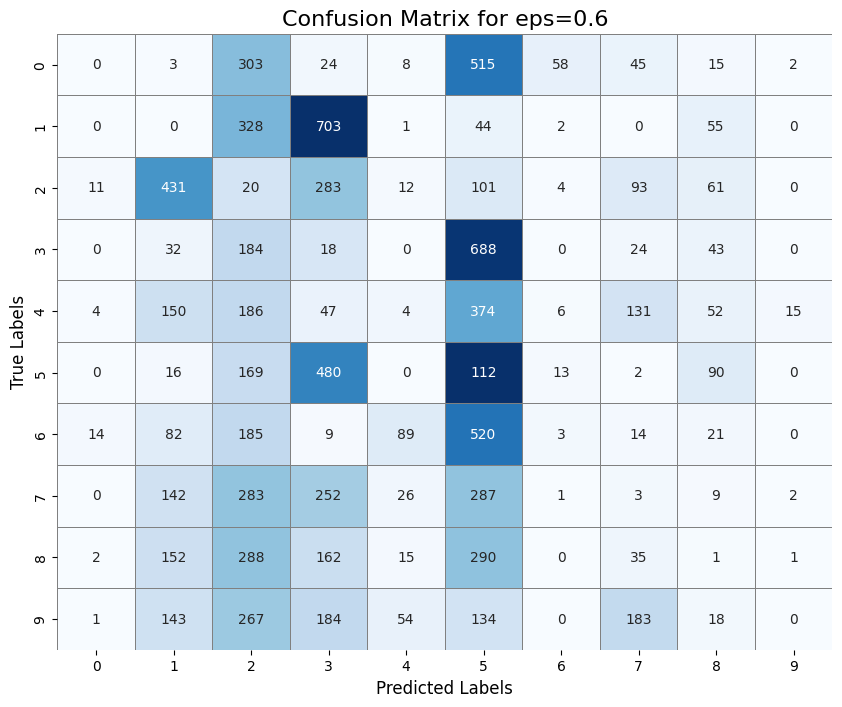

     eps total_correct total_adv  \
0   0.01          9834      9834   
1   0.02          9834      9834   
2   0.03          9834      9834   
3   0.04          9834      9834   
4   0.05          9834      9834   
5   0.10          9834      9834   
6   0.20          9834      9834   
7   0.30          9834      9834   
8   0.40          9834      9834   
9   0.50          9834      9834   
10  0.60          9834      9834   

                                   correct_adv_counts  
0   {0: 971, 1: 1141, 2: 1017, 3: 990, 4: 971, 5: ...  
1   {0: 975, 1: 1156, 2: 1022, 3: 990, 4: 972, 5: ...  
2   {0: 984, 1: 1177, 2: 1011, 3: 996, 4: 971, 5: ...  
3   {0: 986, 1: 1191, 2: 1024, 3: 992, 4: 977, 5: ...  
4   {0: 986, 1: 1227, 2: 1030, 3: 998, 4: 1000, 5:...  
5   {0: 933, 1: 1452, 2: 1081, 3: 1093, 4: 1070, 5...  
6   {0: 410, 1: 1347, 2: 1481, 3: 1197, 4: 952, 5:...  
7   {0: 226, 1: 1063, 2: 1750, 3: 1589, 4: 790, 5:...  
8   {0: 120, 1: 1058, 2: 1890, 3: 1964, 4: 618, 5:...  
9   {0:

<ipython-input-64-18fe375a8b4b>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Disable eager execution (necessary for ART with TensorFlow v1)
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')


# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

 # For clean examples
y_pred_clean = np.argmax(classifier.predict(correct_examples), axis=1)
accuracy_clean = np.sum(y_pred_clean == correct_labels) / len(correct_labels)
print(f"Accuracy on clean data: {accuracy_clean * 100:.2f}%")

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['eps', 'total_correct', 'total_adv', 'correct_adv_counts'])

# Loop over the eps values
for eps in eps_range:
    # Define the attack with the current eps
    attack = FastGradientMethod(classifier, eps=eps)

    # Apply the attack to generate adversarial examples
    x_adv = attack.generate(x=correct_examples)

    # Predict the labels of the adversarial examples
    y_adv = np.argmax(classifier.predict(x_adv), axis=1)


    nb_correct_adv_pred = np.sum(y_adv == correct_labels)

    print(f"Adversarial test data: eps:{eps}")
    print("Correctly classified: {}".format(nb_correct_adv_pred))
    print("Incorrectly classified: {}".format(len(correct_examples)-nb_correct_adv_pred))

    # For clean examples
    y_pred_clean = np.argmax(classifier.predict(correct_examples), axis=1)
    accuracy_clean = np.sum(y_pred_clean == correct_labels) / len(correct_labels)
    print(f"accuracy_clean:{accuracy_clean}")
    # Inside the loop for each eps
    # You have already calculated this for adversarial examples:
    # nb_correct_adv_pred = np.sum(y_adv == correct_labels)
    # Now calculate the accuracy for adversarial examples
    accuracy_adv = nb_correct_adv_pred / len(correct_labels)

    print(f"Accuracy on clean data: {accuracy_clean * 100:.2f}%")
    print(f"Adversarial test data: eps:{eps}")
    print(f"Accuracy on adversarial examples: {accuracy_adv * 100:.2f}%")



    # Count the occurrences of each label in the adversarial predictions
    unique_adv, counts_adv = np.unique(y_adv, return_counts=True)
    adv_counts = dict(zip(unique_adv, counts_adv))

    # Calculate the confusion matrix
    cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

    # Draw and save the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a mask for the diagonal elements
    mask = np.eye(len(cm), dtype=bool)

    # Plot the heatmap for off-diagonal elements using the mask
    # Use a professional color palette like 'Blues'
    sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

    # Plot the heatmap for diagonal elements using the inverse of the mask
    # Use the same color palette for consistency
    sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
    # Labels, title and ticks
    label_names = [f'{i}' for i in range(10)]
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)


    image_filename = f'confusion_matrix_eps_{eps}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.show()


    # Save the results in the DataFrame
    results_df = results_df.append({
        'eps': eps,
        'total_correct': len(correct_labels),
        'total_adv': len(y_adv),
        'correct_adv_counts': adv_counts
    }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/withouttruelabel_adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


# **FastGradientMethod-- eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6] With Label**

Adversarial test data: eps:0.01
Correctly classified: 9774
Incorrectly classified: 60
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.01
Accuracy on adversarial examples: 99.39%


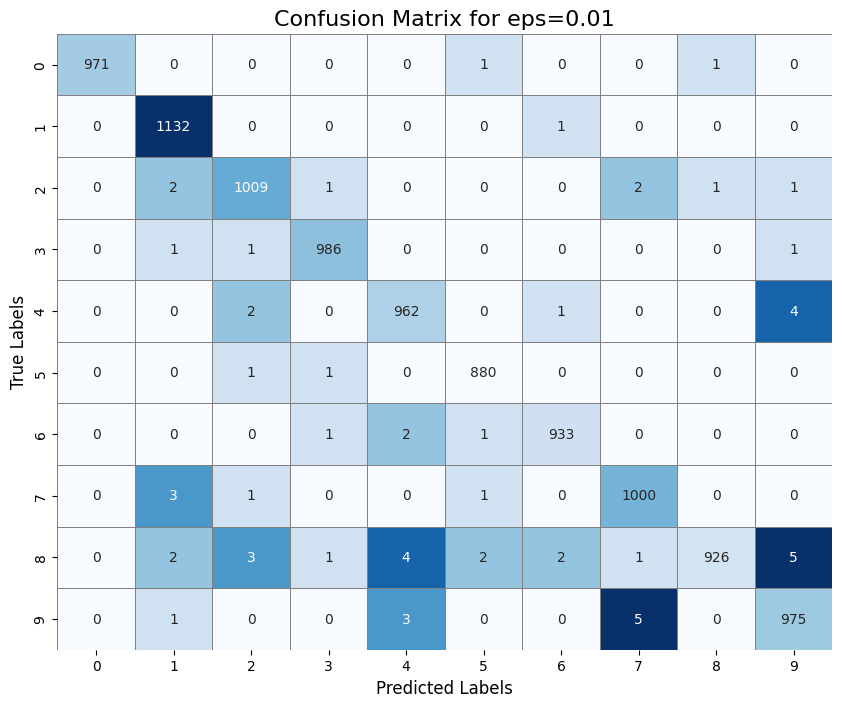

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.02
Correctly classified: 9692
Incorrectly classified: 142
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.02
Accuracy on adversarial examples: 98.56%


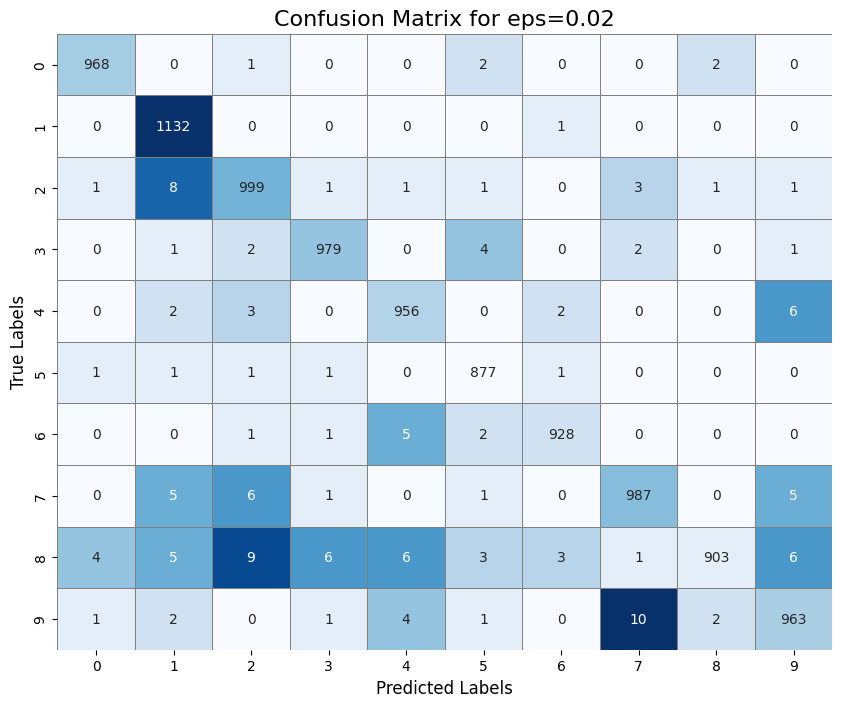

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.03
Correctly classified: 9550
Incorrectly classified: 284
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.03
Accuracy on adversarial examples: 97.11%


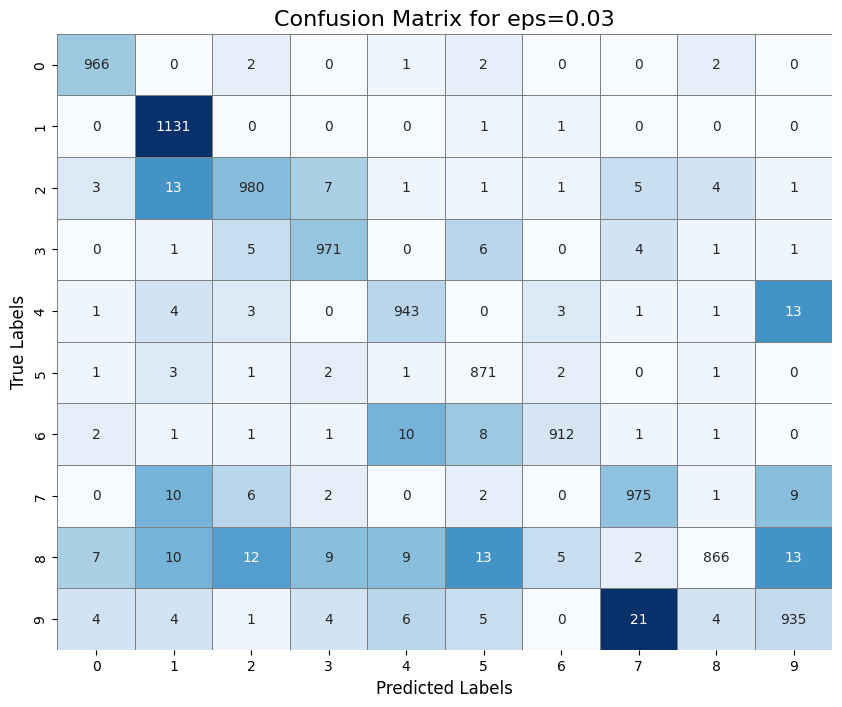

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.04
Correctly classified: 9394
Incorrectly classified: 440
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.04
Accuracy on adversarial examples: 95.53%


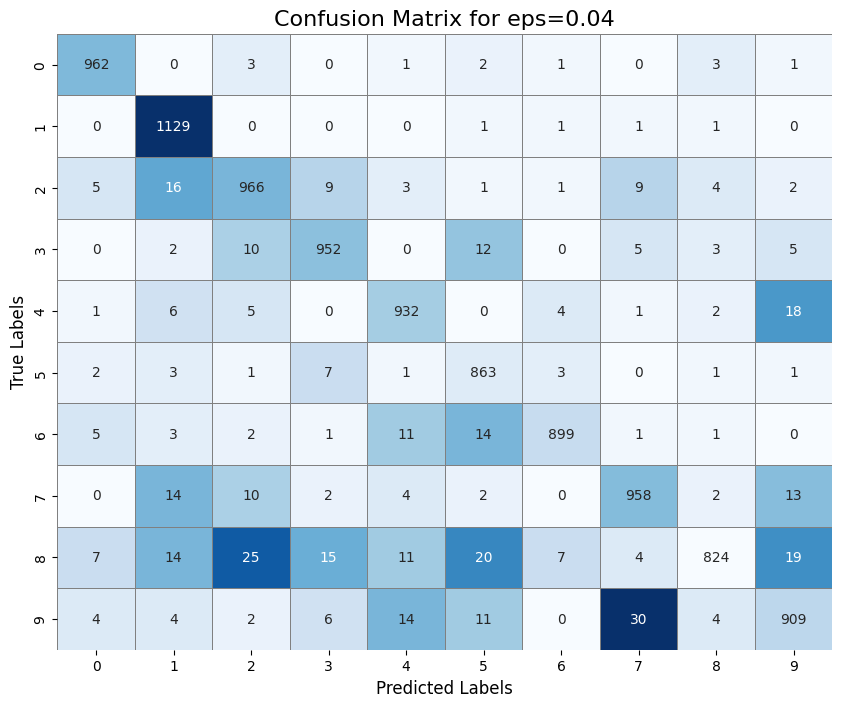

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.05
Correctly classified: 9132
Incorrectly classified: 702
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.05
Accuracy on adversarial examples: 92.86%


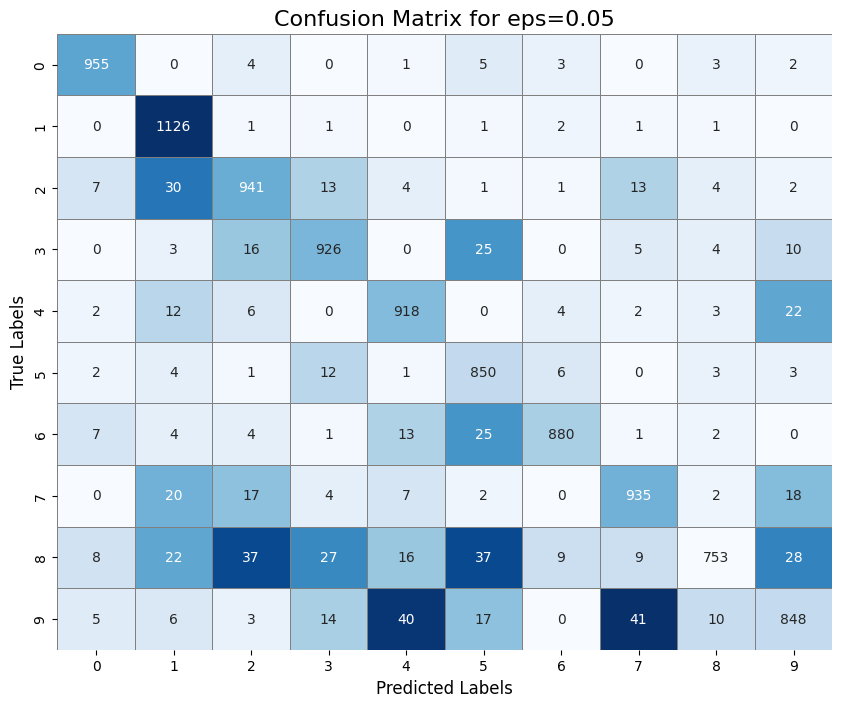

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.1
Correctly classified: 6834
Incorrectly classified: 3000
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.1
Accuracy on adversarial examples: 69.49%


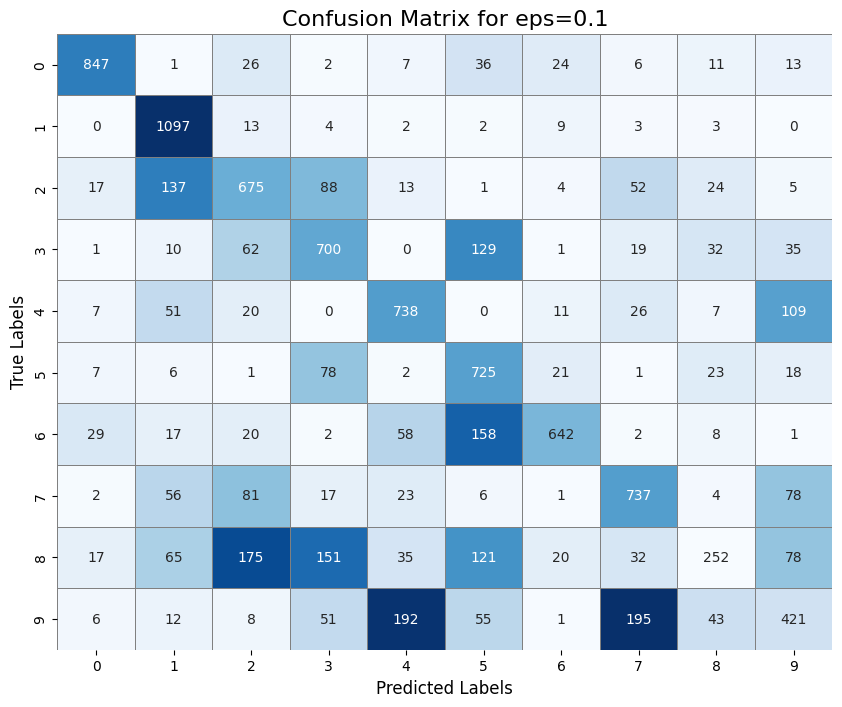

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.2
Correctly classified: 2300
Incorrectly classified: 7534
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.2
Accuracy on adversarial examples: 23.39%


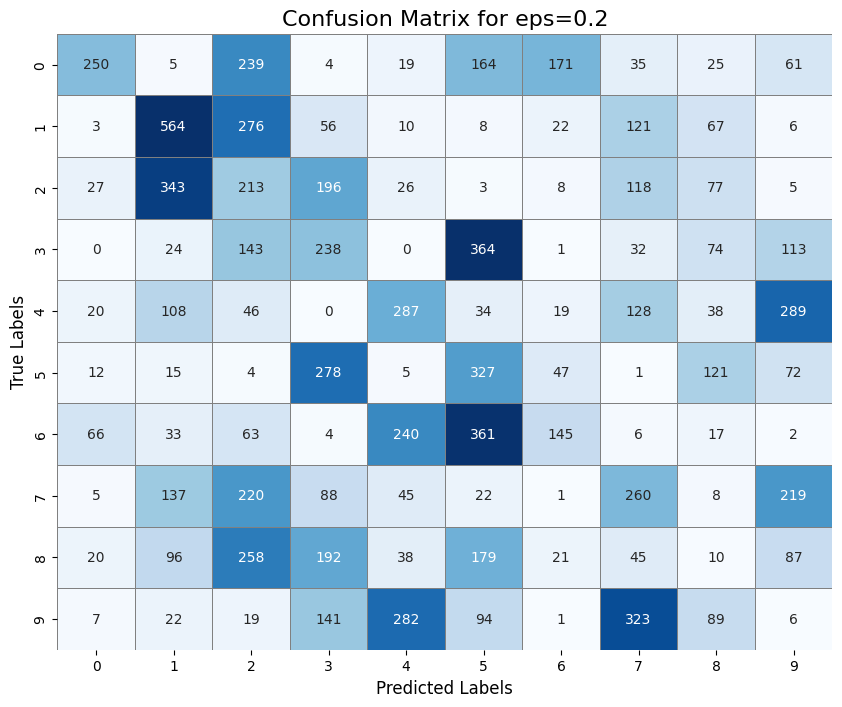

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.3
Correctly classified: 793
Incorrectly classified: 9041
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.3
Accuracy on adversarial examples: 8.06%


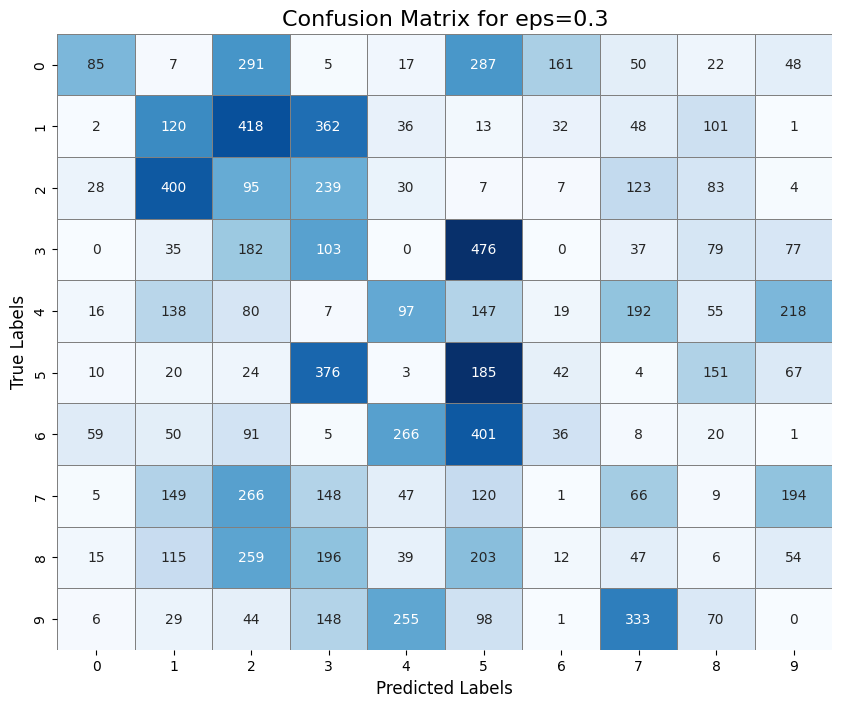

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.4
Correctly classified: 347
Incorrectly classified: 9487
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.4
Accuracy on adversarial examples: 3.53%


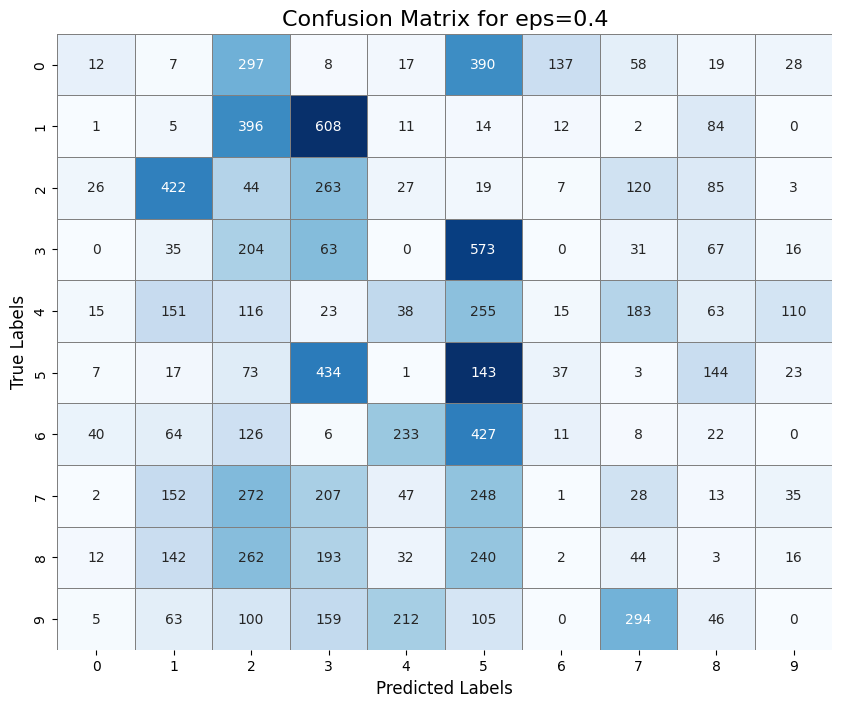

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.5
Correctly classified: 211
Incorrectly classified: 9623
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.5
Accuracy on adversarial examples: 2.15%


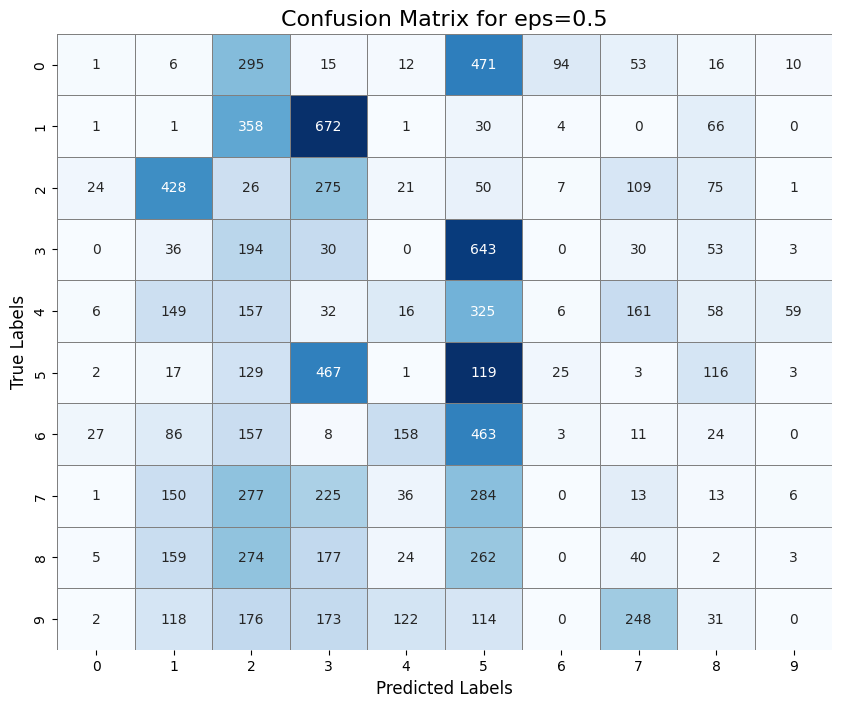

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Adversarial test data: eps:0.6
Correctly classified: 161
Incorrectly classified: 9673
accuracy_clean:1.0
Accuracy on clean data: 100.00%
Adversarial test data: eps:0.6
Accuracy on adversarial examples: 1.64%


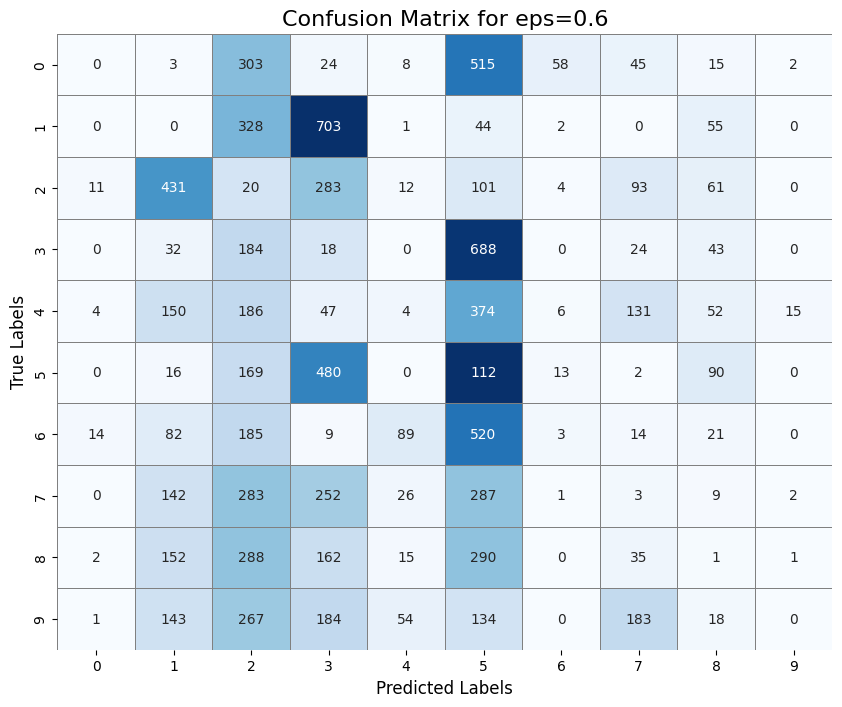

     eps total_correct total_adv  \
0   0.01          9834      9834   
1   0.02          9834      9834   
2   0.03          9834      9834   
3   0.04          9834      9834   
4   0.05          9834      9834   
5   0.10          9834      9834   
6   0.20          9834      9834   
7   0.30          9834      9834   
8   0.40          9834      9834   
9   0.50          9834      9834   
10  0.60          9834      9834   

                                   correct_adv_counts  
0   {0: 971, 1: 1141, 2: 1017, 3: 990, 4: 971, 5: ...  
1   {0: 975, 1: 1156, 2: 1022, 3: 990, 4: 972, 5: ...  
2   {0: 984, 1: 1177, 2: 1011, 3: 996, 4: 971, 5: ...  
3   {0: 986, 1: 1191, 2: 1024, 3: 992, 4: 977, 5: ...  
4   {0: 986, 1: 1227, 2: 1030, 3: 998, 4: 1000, 5:...  
5   {0: 933, 1: 1452, 2: 1081, 3: 1093, 4: 1070, 5...  
6   {0: 410, 1: 1347, 2: 1481, 3: 1197, 4: 952, 5:...  
7   {0: 226, 1: 1063, 2: 1750, 3: 1589, 4: 790, 5:...  
8   {0: 120, 1: 1058, 2: 1890, 3: 1964, 4: 618, 5:...  
9   {0:

<ipython-input-65-1f2968efe6e5>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['eps', 'total_correct', 'total_adv', 'correct_adv_counts'])

# Loop over the eps values
for eps in eps_range:
    # Define the attack with the current eps
    attack = FastGradientMethod(classifier, eps=eps)

    # Apply the attack to generate adversarial examples
    x_adv = attack.generate(x=correct_examples ,y=correct_labels)

    # Predict the labels of the adversarial examples
    y_adv = np.argmax(classifier.predict(x_adv), axis=1)

    nb_correct_adv_pred = np.sum(y_adv == correct_labels)

    print(f"Adversarial test data: eps:{eps}")
    print("Correctly classified: {}".format(nb_correct_adv_pred))
    print("Incorrectly classified: {}".format(len(correct_examples)-nb_correct_adv_pred))

    # For clean examples
    y_pred_clean = np.argmax(classifier.predict(correct_examples), axis=1)
    accuracy_clean = np.sum(y_pred_clean == correct_labels) / len(correct_labels)
    print(f"accuracy_clean:{accuracy_clean}")
    # Inside the loop for each eps
    # You have already calculated this for adversarial examples:
    # nb_correct_adv_pred = np.sum(y_adv == correct_labels)
    # Now calculate the accuracy for adversarial examples
    accuracy_adv = nb_correct_adv_pred / len(correct_labels)

    print(f"Accuracy on clean data: {accuracy_clean * 100:.2f}%")
    print(f"Adversarial test data: eps:{eps}")
    print(f"Accuracy on adversarial examples: {accuracy_adv * 100:.2f}%")



    # Count the occurrences of each label in the adversarial predictions
    unique_adv, counts_adv = np.unique(y_adv, return_counts=True)
    adv_counts = dict(zip(unique_adv, counts_adv))

    # Calculate the confusion matrix
    cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

   # Draw and save the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a mask for the diagonal elements
    mask = np.eye(len(cm), dtype=bool)

    # Plot the heatmap for off-diagonal elements using the mask
    # Use a professional color palette like 'Blues'
    sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

    # Plot the heatmap for diagonal elements using the inverse of the mask
    # Use the same color palette for consistency
    sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
    # Labels, title and ticks
    label_names = [f'{i}' for i in range(10)]
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)
    image_filename = f'_correct_labels_confusion_matrix_eps_{eps}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.show()

    # Save the results in the DataFrame
    results_df = results_df.append({
        'eps': eps,
        'total_correct': len(correct_labels),
        'total_adv': len(y_adv),
        'correct_adv_counts': adv_counts
    }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/with_truelabel_adv_results_labels.csv', index=False)

# Print the DataFrame
print(results_df)


# **Attacks run 5 times on each eps Without Label**

In [ ]:

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame()

# Loop over the eps values
for eps in eps_range:
    for attack_num in range(1, 6):  # Perform attack 5 times
        # Define the attack with the current eps
        attack = FastGradientMethod(classifier, eps=eps)

        # Apply the attack to generate adversarial examples
        x_adv = attack.generate(x=correct_examples)

        # Predict the labels of the adversarial examples
        y_adv = np.argmax(classifier.predict(x_adv), axis=1)

        nb_correct_adv_pred = np.sum(y_adv == correct_labels)

        print(f"Adversarial test data: eps:{eps}")
        print("Correctly classified: {}".format(nb_correct_adv_pred))
        print("Incorrectly classified: {}".format(len(correct_examples)-nb_correct_adv_pred))

        # For clean examples
        y_pred_clean = np.argmax(classifier.predict(correct_examples), axis=1)
        accuracy_clean = np.sum(y_pred_clean == correct_labels) / len(correct_labels)
        print(f"accuracy_clean:{accuracy_clean}")
        # Inside the loop for each eps
        # You have already calculated this for adversarial examples:
        # nb_correct_adv_pred = np.sum(y_adv == correct_labels)
        # Now calculate the accuracy for adversarial examples
        accuracy_adv = nb_correct_adv_pred / len(correct_labels)

        print(f"Accuracy on clean data: {accuracy_clean * 100:.2f}%")
        print(f"Adversarial test data: eps:{eps}")
        print(f"Accuracy on adversarial examples: {accuracy_adv * 100:.2f}%")


        # Calculate the confusion matrix
        cm = confusion_matrix(correct_labels, y_adv, labels=range(10))
        # Draw and save the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create a mask for the diagonal elements
        mask = np.eye(len(cm), dtype=bool)

        # Plot the heatmap for off-diagonal elements using the mask
        # Use a professional color palette like 'Blues'
        sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Plot the heatmap for diagonal elements using the inverse of the mask
        # Use the same color palette for consistency
        sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Labels, title and ticks
        label_names = [f'{i}' for i in range(10)]
        ax.set_xlabel('Predicted Labels', fontsize=12)
        ax.set_ylabel('True Labels', fontsize=12)
        ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
        ax.set_xticklabels(label_names)
        ax.set_yticklabels(label_names)
        image_filename = f'confusion_matrix_eps_{eps}_attack_{attack_num}.png'
        plt.savefig(image_filename, bbox_inches='tight')
        plt.show()  # Close the figure to avoid displaying it in the notebook

        # Save the results in the DataFrame
        results_df = results_df.append({
            'eps': eps,
            'attack_num': attack_num,
            'total_correct': len(correct_labels),
            'total_adv': len(y_adv),
            'correct_adv_counts': dict(zip(*np.unique(y_adv, return_counts=True)))
        }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/5attack_withouttruelabel_adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


# **Attacks run 5 times on each eps With Label**

In [ ]:
# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame()

# Loop over the eps values
for eps in eps_range:
    for attack_num in range(1, 6):  # Perform attack 5 times
        # Define the attack with the current eps
        attack = FastGradientMethod(classifier, eps=eps)

        # Apply the attack to generate adversarial examples
        x_adv = attack.generate(x=correct_examples,y=correct_labels)

        # Predict the labels of the adversarial examples
        y_adv = np.argmax(classifier.predict(x_adv), axis=1)

        nb_correct_adv_pred = np.sum(y_adv == correct_labels)

        print(f"Adversarial test data: eps:{eps}")
        print("Correctly classified: {}".format(nb_correct_adv_pred))
        print("Incorrectly classified: {}".format(len(correct_examples)-nb_correct_adv_pred))

        # For clean examples
        y_pred_clean = np.argmax(classifier.predict(correct_examples), axis=1)
        accuracy_clean = np.sum(y_pred_clean == correct_labels) / len(correct_labels)
        print(f"accuracy_clean:{accuracy_clean}")
        # Inside the loop for each eps
        # You have already calculated this for adversarial examples:
        # nb_correct_adv_pred = np.sum(y_adv == correct_labels)
        # Now calculate the accuracy for adversarial examples
        accuracy_adv = nb_correct_adv_pred / len(correct_labels)

        print(f"Accuracy on clean data: {accuracy_clean * 100:.2f}%")
        print(f"Adversarial test data: eps:{eps}")
        print(f"Accuracy on adversarial examples: {accuracy_adv * 100:.2f}%")


        # Calculate the confusion matrix
        cm = confusion_matrix(correct_labels, y_adv, labels=range(10))
        # Draw and save the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create a mask for the diagonal elements
        mask = np.eye(len(cm), dtype=bool)

        # Plot the heatmap for off-diagonal elements using the mask
        # Use a professional color palette like 'Blues'
        sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Plot the heatmap for diagonal elements using the inverse of the mask
        # Use the same color palette for consistency
        sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Labels, title and ticks
        label_names = [f'{i}' for i in range(10)]
        ax.set_xlabel('Predicted Labels', fontsize=12)
        ax.set_ylabel('True Labels', fontsize=12)
        ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
        ax.set_xticklabels(label_names)
        ax.set_yticklabels(label_names)
        image_filename = f'target_confusion_matrix_eps_{eps}_attack_{attack_num}.png'
        plt.savefig(image_filename, bbox_inches='tight')
        plt.show()  # Close the figure to avoid displaying it in the notebook

        # Save the results in the DataFrame
        results_df = results_df.append({
            'eps': eps,
            'attack_num': attack_num,
            'total_correct': len(correct_labels),
            'total_adv': len(y_adv),
            'correct_adv_counts': dict(zip(*np.unique(y_adv, return_counts=True)))
        }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/5attack_withtruelabel_adv_results.csv', index=False)

# Print the DataFrame
print(results_df)
